In [116]:
# KNN İLE SPOTİFY ŞARKI ÖNERİ UYGULAMASI
# G211210006 BERKEHAN UYGUR
# VERİSETİ: https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset

In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import ast

In [118]:
data = pd.read_csv("Spotify-2000.csv")

KeyError: 'genres'

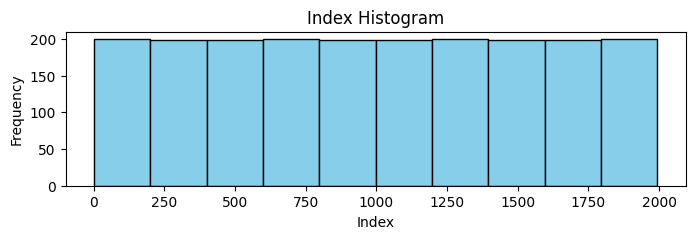

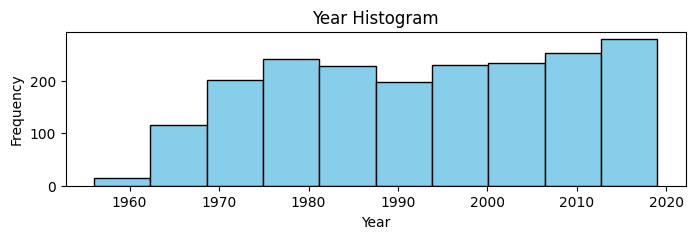

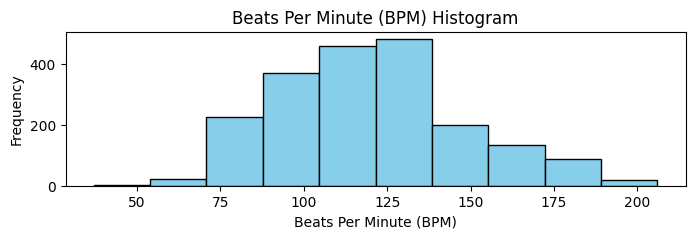

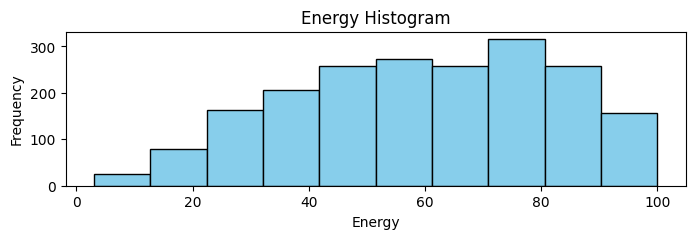

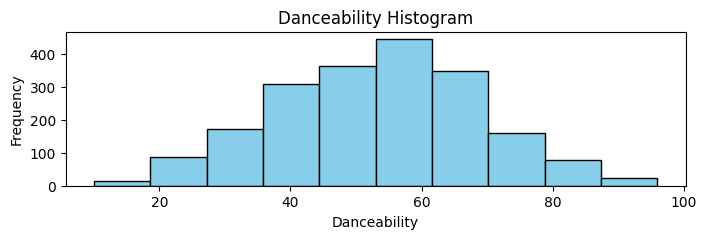

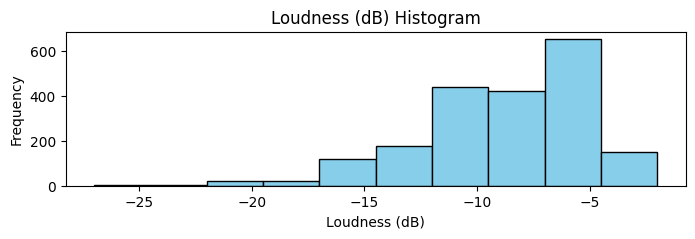

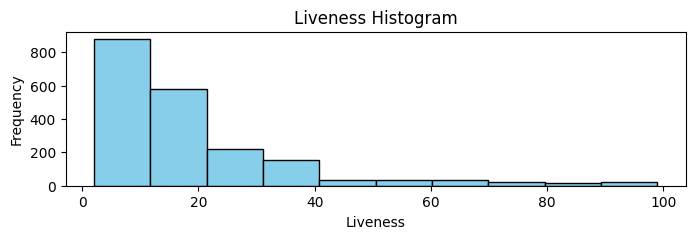

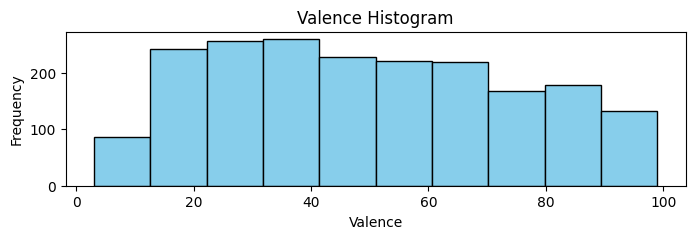

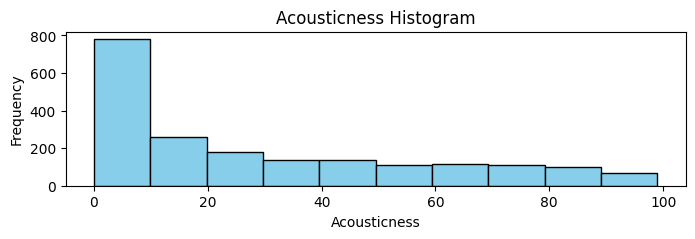

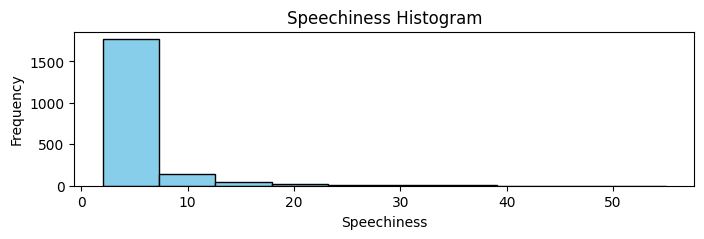

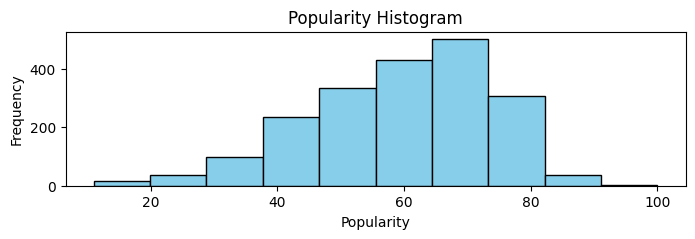

In [101]:
#AYKIRI DEĞERE SAHİP ÖZELLİKLERİ BELİRLEYELİM
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 2))
    plt.hist(data[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [102]:
data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [103]:
df=pd.DataFrame(data)

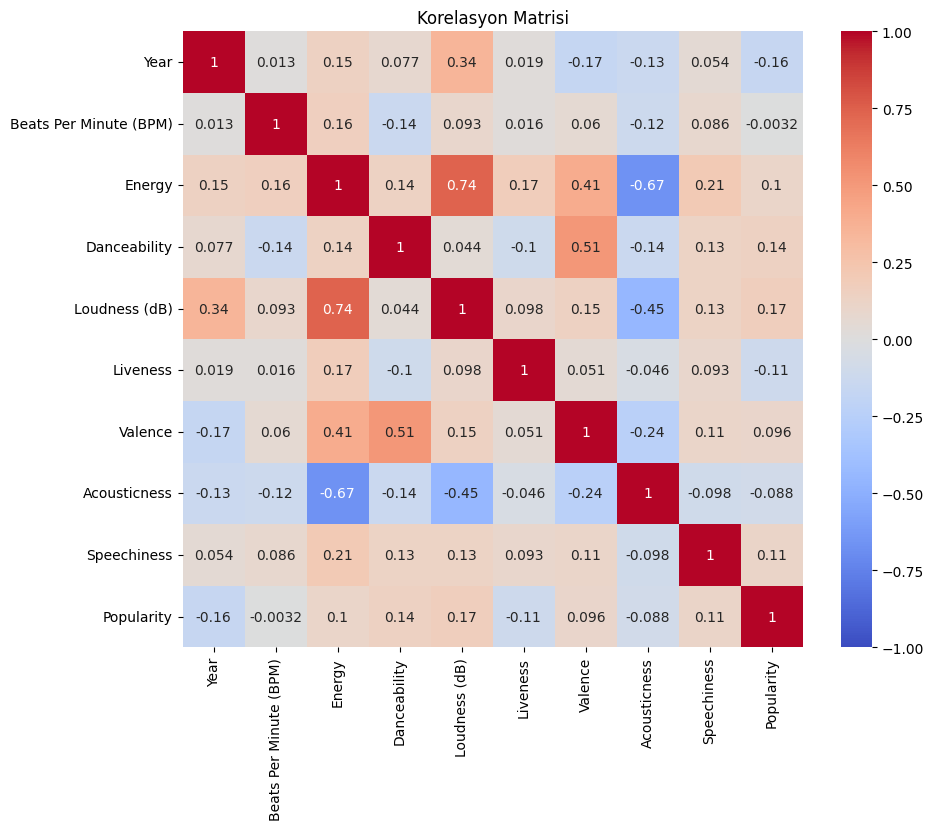

In [ ]:
input_matrix = data.drop(columns=['Index','Title','Artist','Top Genre','Length (Duration)'],axis=1)
correlation_matrix = input_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasyon Matrisi")
plt.show()

In [105]:
x=df[['Year','Beats Per Minute (BPM)','Danceability','Loudness (dB)','Liveness','Valence','Acousticness','Popularity']].values
y=df[['Title','Artist']].values

In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [107]:
knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn.fit(X_scaled)

NearestNeighbors()

In [108]:
sample_song = np.array([[2019,135,70,-11,10,56,33,95]])


In [109]:
sample_scaled = scaler.transform(sample_song)

In [110]:
distances, indices = knn.kneighbors(sample_scaled)


In [111]:
print("En yakın komşu şarkılar:")
for index in indices[0]:
    print(df.iloc[index]['Title']+" by "+df.iloc[index]['Artist'])

En yakın komşu şarkılar:
bad guy by Billie Eilish
In My Blood by Shawn Mendes
I'm Yours by Jason Mraz
New Light by John Mayer
Last Christmas by Wham!
